In [93]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [94]:
BATCH_SIZE = 32
IMAGE_SIZE = 256

train = tf.keras.preprocessing.image_dataset_from_directory(
    "train_data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 150 files belonging to 16 classes.


In [95]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    "test_data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 157 files belonging to 16 classes.


In [96]:
test

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [97]:
class_names = test.class_names
class_names

['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']

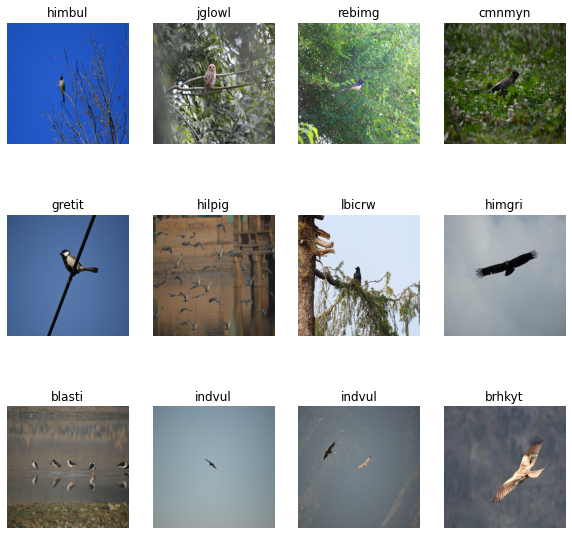

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for image_batch, label_batch in test.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [99]:
from tensorflow.keras import models, layers
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1. / 255),
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [100]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [101]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_30 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_31 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_48 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [102]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [103]:
history = model.fit(
    train,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=50,
    validation_data=test
)

Epoch 1/50
5/5 [==============================] - 7s 840ms/step - loss: nan - accuracy: 0.1067 - val_loss: nan - val_accuracy: 0.0955
Epoch 2/50
5/5 [==============================] - 6s 835ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0955
Epoch 3/50
5/5 [==============================] - 6s 794ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0955
Epoch 4/50
5/5 [==============================] - 5s 787ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0955
Epoch 5/50
5/5 [==============================] - 6s 846ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0955
Epoch 6/50
5/5 [==============================] - 6s 792ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0955
Epoch 7/50
5/5 [==============================] - 6s 803ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0955
Epoch 8/50
5/5 [==============================] - 6s 905ms/ste

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

BATCH_SIZE = 32
IMAGE_SIZE = 256

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze the weights of the pre-trained layers
base_model.trainable = False

train = tf.keras.preprocessing.image_dataset_from_directory(
    "train_data",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    "test_data",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Apply data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

# Preprocess input using VGG16's preprocess_input function
preprocess_input = tf.keras.applications.vgg16.preprocess_input

# Create the model by adding the VGG16 base model and the classification layers on top
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),  # Rescale pixel values to [0, 1]
    tf.keras.layers.Lambda(preprocess_input),  # Apply VGG16's preprocess_input function
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(train.class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=50,
)
